Alex Verbs, Kristina Schaufele, Reese Wolfe 

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
# Parameters
img_height = 180
img_width = 180
batch_size = 32

# Directory paths for training and testing
train_dir = "data/Training"
test_dir = "data/Testing"

# Load the training dataset
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the testing dataset
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print("Class names:", class_names)
print("Training batches:", train_ds.cardinality().numpy())
print("Testing batches:", test_ds.cardinality().numpy())

Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training batches: 179
Testing batches: 41


In [38]:
# Define a simple CNN model
model = Sequential([
    # First convolutional layer with batch normalization and max pooling
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from convolutional layers
    Flatten(),

    # Output layer with 4 neurons for the four tumor types
    Dense(4, activation='softmax')
])

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

/opt/miniconda3/envs/neuralNetworks2024/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 253472)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │     1,013,892 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,916 (3.87 MB)

 Trainable params: 1,014,852 (3.87 MB)

 Non-trainable params: 64 (256.00 B)

In [39]:
# Train the model
epochs = 5  # Set your desired number of epochs
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print("\nTest accuracy:", test_acc)

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.6395 - loss: 0.9801 - val_accuracy: 0.7933 - val_loss: 0.5807
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.8685 - loss: 0.3463 - val_accuracy: 0.8375 - val_loss: 0.4407
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.9302 - loss: 0.2064 - val_accuracy: 0.8764 - val_loss: 0.3313
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 149ms/step - accuracy: 0.9600 - loss: 0.1387 - val_accuracy: 0.9108 - val_loss: 0.2648
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0.9814 - loss: 0.0979 - val_accuracy: 0.9214 - val_loss: 0.2304
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8846 - loss: 0.3206

Test accuracy: 0.9214340448379517


In [40]:
train_loss, train_acc = model.evaluate(train_ds)
test_loss, test_acc = model.evaluate(test_ds)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9922 - loss: 0.0689
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8846 - loss: 0.3206
Training accuracy: 0.993172287940979
Testing accuracy: 0.9214340448379517


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Sample true labels: [0 0 0 0 0 0 0 0 0 0]
Sample predicted labels: [0 0 0 1 0 1 0 0 0 0]
Manual Testing Accuracy: 0.9214340198321892


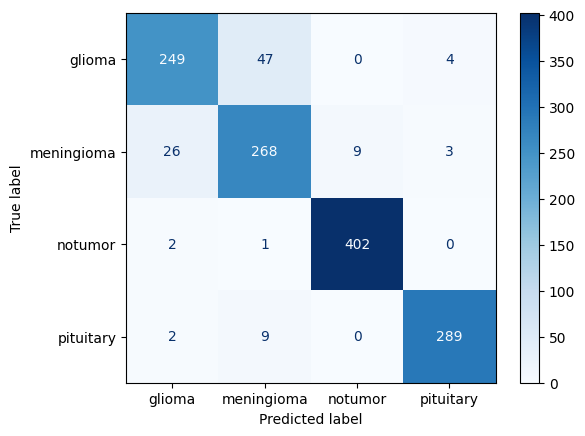

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract true labels from `test_ds`
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Predict using the model on the test dataset
y_pred = np.argmax(model.predict(test_ds), axis=-1)

# Check if sample shapes match
print("Sample true labels:", y_true[:10])
print("Sample predicted labels:", y_pred[:10])

# Calculate manual accuracy
accuracy_manual = np.mean(y_true == y_pred)
print("Manual Testing Accuracy:", accuracy_manual)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['glioma', 'meningioma', 'notumor', 'pituitary'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
class_names = train_ds.class_names  # Should match alphabetical order of subdirectories in 'Training' directory
print("Class names in model:", class_names)

Class names in model: ['glioma', 'meningioma', 'notumor', 'pituitary']
